In [14]:
import pandas as pd
import requests
from io import StringIO

In [15]:
# Download the Data:

url = "https://raw.githubusercontent.com/amankharwal/Website-data/master/electricity.csv"

# Fetch the CSV data using requests
response = requests.get(url)

# Check if the request was successful
if response.status_code == 200:
    csv_data = response.content.decode('utf-8')
else:
    print(f"Failed to retrieve data: {response.status_code}")

In [16]:
# Load the Data into DataFrame:

# Use StringIO to convert string data into a file-like object so that pandas can read it using read_csv
data = StringIO(csv_data)

# Load the data into a pandas DataFrame without DtypeWarning
df = pd.read_csv(data, low_memory=False)

In [17]:
# Data Inspection:

#print(df.head())  # Print the first few rows of the DataFrame

In [18]:
# Data Cleaning:

# Check for missing values
#print(df.isnull().sum())

# If there are any, you might decide to fill them or drop them
# df = df.fillna(method='ffill')  # Example: forward fill
# df = df.dropna()  # Example: drop rows with missing values

In [19]:
# Exploratory Data Analysis (EDA):

# Descriptive statistics
#print(df.describe())

# Data types
#print(df.dtypes)

In [20]:
# Data Preprocessing:

# For example, converting the 'DateTime' column to datetime type
df['DateTime'] = pd.to_datetime(df['DateTime'],format='mixed')

# If 'Holiday' is a categorical variable, convert it to numerical using one-hot encoding
df = pd.get_dummies(df, columns=['Holiday'], drop_first=True)

In [21]:
# Step 1: Identify Christmas Day and Eve

# Convert the 'DateTime' column to datetime if not already done
df['DateTime'] = pd.to_datetime(df['DateTime'])

# Create masks for Christmas Eve and Christmas Day
christmas_eve_mask = (df['DateTime'].dt.month == 12) & (df['DateTime'].dt.day == 24)
christmas_day_mask = (df['DateTime'].dt.month == 12) & (df['DateTime'].dt.day == 25)

# Apply the masks to the dataset to filter the relevant days
christmas_eve_data = df[christmas_eve_mask]
christmas_day_data = df[christmas_day_mask]

In [22]:
#Step 2: Analyze Energy Prices

import pandas as pd

with pd.option_context('mode.chained_assignment', None):
    christmas_eve_data.loc[:, 'SMPEA'] = pd.to_numeric(christmas_eve_data['SMPEA'], errors='coerce')
    christmas_day_data.loc[:, 'SMPEA'] = pd.to_numeric(christmas_day_data['SMPEA'], errors='coerce')

# Calculate the average price for each hour on Christmas Eve and Christmas Day
average_prices_eve = christmas_eve_data.groupby(christmas_eve_data['DateTime'].dt.hour)['SMPEA'].mean()
average_prices_day = christmas_day_data.groupby(christmas_day_data['DateTime'].dt.hour)['SMPEA'].mean()

In [23]:
# Find the hour with the lowest average price on Christmas Eve
cheapest_hour_eve = average_prices_eve.idxmin()
cheapest_price_eve = average_prices_eve.min()

# Find the hour with the lowest average price on Christmas Day
cheapest_hour_day = average_prices_day.idxmin()
cheapest_price_day = average_prices_day.min()

print(f"The cheapest hour to cook on Christmas Eve is at {cheapest_hour_eve}:00 with an average price of {cheapest_price_eve:.2f}.")
print(f"The cheapest hour to cook on Christmas Day is at {cheapest_hour_day}:00 with an average price of {cheapest_price_day:.2f}.")

The cheapest hour to cook on Christmas Eve is at 6:00 with an average price of 34.82.
The cheapest hour to cook on Christmas Day is at 5:00 with an average price of 34.26.


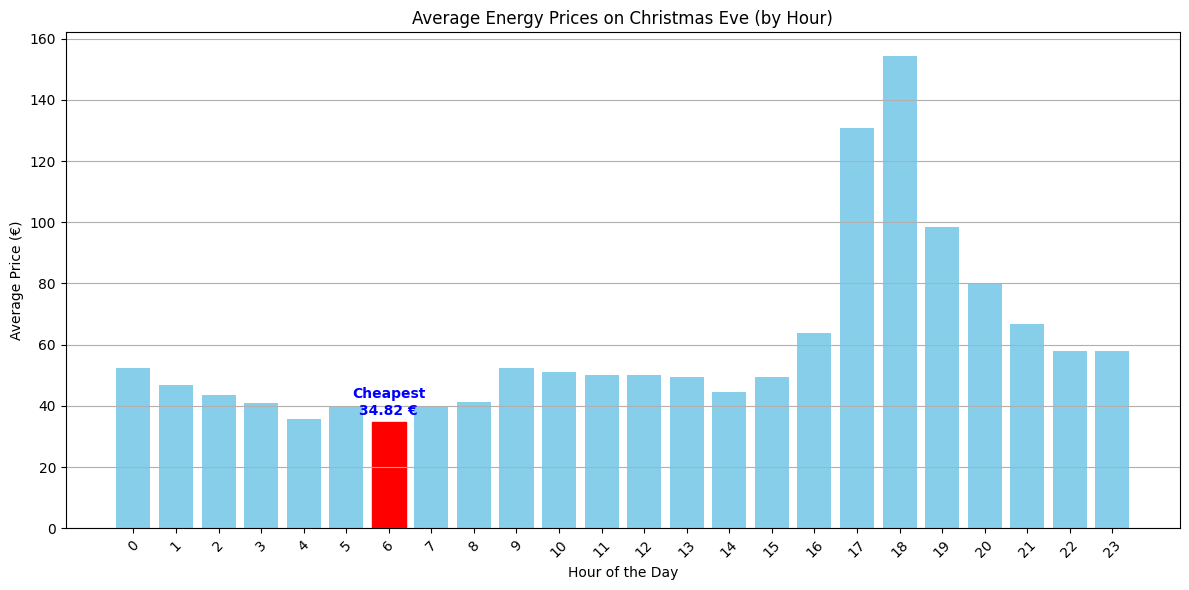

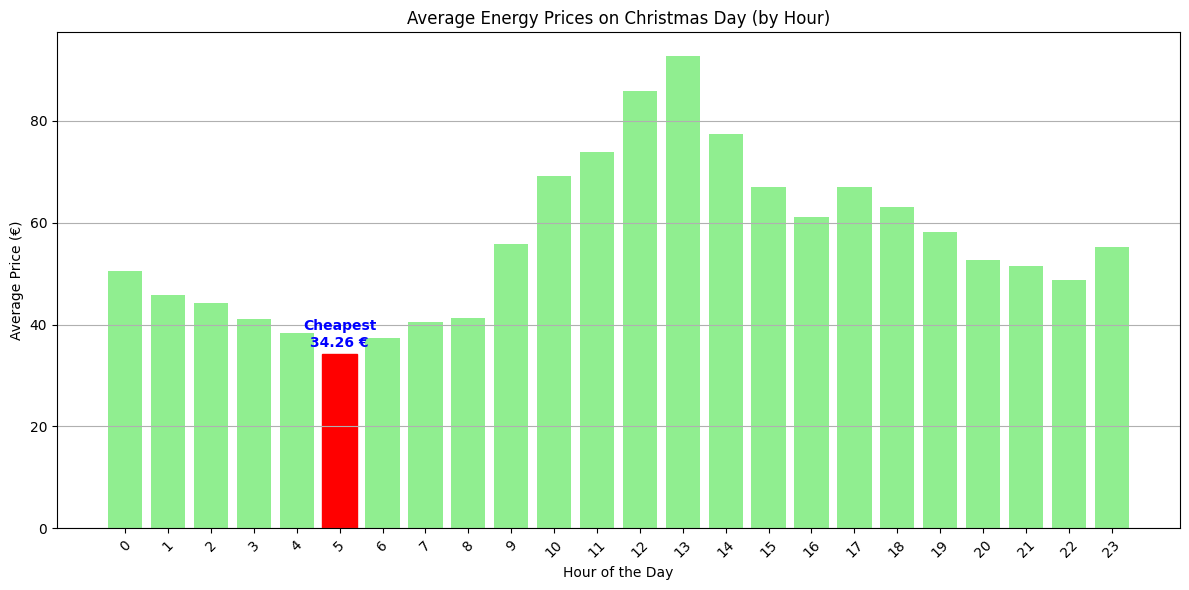

In [24]:
import matplotlib.pyplot as plt

# Helper function to add a label to the bar
def add_label(ax, x, height, text, color='blue'):
    ax.annotate('{}'.format(text),
                xy=(x, height),
                xytext=(0, 3),  # 3 points vertical offset
                textcoords="offset points",
                ha='center', va='bottom',
                color=color, fontsize=10, fontweight='bold')

# Sort the index (hour of the day) to ensure correct order
average_prices_eve.sort_index(inplace=True)
average_prices_day.sort_index(inplace=True)

# Plot for Christmas Eve
plt.figure(figsize=(12, 6))
bars_eve = plt.bar(average_prices_eve.index, average_prices_eve.values, color='skyblue')
plt.gca().set_xticks(average_prices_eve.index)

# Highlight the cheapest hour
cheapest_bar_eve = bars_eve[cheapest_hour_eve]
cheapest_bar_eve.set_color('red')
add_label(plt.gca(), cheapest_hour_eve, cheapest_price_eve, f'Cheapest\n{cheapest_price_eve:.2f} €')

plt.title('Average Energy Prices on Christmas Eve (by Hour)')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Price (€)')
plt.xticks(range(0, 24), rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# Plot for Christmas Day
plt.figure(figsize=(12, 6))
bars_day = plt.bar(average_prices_day.index, average_prices_day.values, color='lightgreen')
plt.gca().set_xticks(average_prices_day.index)

# Highlight the cheapest hour
cheapest_bar_day = bars_day[cheapest_hour_day]
cheapest_bar_day.set_color('red')
add_label(plt.gca(), cheapest_hour_day, cheapest_price_day, f'Cheapest\n{cheapest_price_day:.2f} €')

plt.title('Average Energy Prices on Christmas Day (by Hour)')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Price (€)')
plt.xticks(range(0, 24), rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()